In [46]:
import os
import pandas as pd
from pathlib import Path
import kagglehub

from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [47]:

path_to_dataset3 = kagglehub.dataset_download("sartajbhuvaji/brain-tumor-classification-mri")


print("Path to dataset 3:", path_to_dataset3)


Path to dataset 3: /Users/bennetthaidu/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2


In [48]:
def extract_file_paths_and_labels(dataset_path):
    file_paths = []
    labels = []
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith((".jpg", ".png", ".jpeg")):  # Add other image formats if needed
                file_paths.append(os.path.join(root, file))
                labels.append(os.path.basename(root))  # Use folder name as label
    return file_paths, labels


file_paths3, labels3 = extract_file_paths_and_labels(path_to_dataset3)



In [49]:
file_paths3

['/Users/bennetthaidu/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2/Training/no_tumor/image(115).jpg',
 '/Users/bennetthaidu/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2/Training/no_tumor/image(142).jpg',
 '/Users/bennetthaidu/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2/Training/no_tumor/image(49).jpg',
 '/Users/bennetthaidu/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2/Training/no_tumor/image(1).jpg',
 '/Users/bennetthaidu/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2/Training/no_tumor/image(284).jpg',
 '/Users/bennetthaidu/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2/Training/no_tumor/image(154).jpg',
 '/Users/bennetthaidu/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2/Training/no_tumor/image(292).jpg',
 '/Users/bennetthaidu/.cache/k

In [50]:

df_3 = pd.DataFrame({
    "file_path": file_paths3,
    "label": labels3
})
print("Combined DataFrame:")
print(df_3.head())

Combined DataFrame:
                                           file_path     label
0  /Users/bennetthaidu/.cache/kagglehub/datasets/...  no_tumor
1  /Users/bennetthaidu/.cache/kagglehub/datasets/...  no_tumor
2  /Users/bennetthaidu/.cache/kagglehub/datasets/...  no_tumor
3  /Users/bennetthaidu/.cache/kagglehub/datasets/...  no_tumor
4  /Users/bennetthaidu/.cache/kagglehub/datasets/...  no_tumor


In [52]:
missing_values = df_3.isnull().sum()
print("Missing values in each column:")
print(missing_values)

duplicate_file_paths = df_3.duplicated(subset=["file_path"]).sum()
print(f"\nNumber of duplicate file paths: {duplicate_file_paths}")

duplicate_rows = df_3.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

label_distribution = df_3["label"].value_counts()
print("\nLabel distribution:")
print(label_distribution)

invalid_file_paths = df_3[~df_3["file_path"].apply(os.path.exists)]
print(f"\nNumber of invalid file paths (files that don't exist): {len(invalid_file_paths)}")
if not invalid_file_paths.empty:
    print("Invalid file paths:")
    print(invalid_file_paths)

Missing values in each column:
file_path    0
label        0
dtype: int64

Number of duplicate file paths: 0
Number of duplicate rows: 0

Label distribution:
meningioma_tumor    937
glioma_tumor        926
pituitary_tumor     901
no_tumor            500
Name: label, dtype: int64

Number of invalid file paths (files that don't exist): 0


In [53]:
def preprocess_images(df, target_size = (250, 250)):
    for idx, row in tqdm(df.iterrows(), total=len(df), desc = "Preprocessing images"):
        try:
            img_path = row["file_path"]
            img = Image.open(img_path)
            

            # Resize to 250x250 if not already
            if img.size != target_size:
                img = img.resize(target_size)  # Resize to 250x250
                
                img.save(img_path)  # Overwrite the original image

        except Exception as e:
            print(f"Error preprocessing {img_path}: {e}")

preprocess_images(df_3)
print("Image resizing complete.")

Preprocessing images: 100%|██████████| 3264/3264 [00:00<00:00, 5016.94it/s]

Image resizing complete.


In [54]:
def convert_images_to_greyscale(df):

    for idx, row in tqdm(df.iterrows(), total=len(df), desc="Converting images to greyscale"):
        try:
            img_path = row["file_path"]
            img = Image.open(img_path)
            img = img.convert("L")  # Convert to greyscale
            img.save(img_path)  # Overwrite the original image
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

convert_images_to_greyscale(df_3)
print("Greyscale conversion complete.")

Converting images to greyscale: 100%|██████████| 3264/3264 [00:10<00:00, 325.48it/s]

Greyscale conversion complete.


In [55]:
def check_image_properties(df):
    results = []
    for idx, row in tqdm(df.iterrows(), total=len(df), desc="Checking images"):
        img_path = row["file_path"]
        try:
            img = Image.open(img_path)

            is_grayscale = img.mode == "L"

            is_correct_size = img.size == (250, 250)

            is_jpg = img_path.lower().endswith(".jpg")

            results.append({
                "file_path": img_path,
                "is_grayscale": is_grayscale,
                "is_correct_size": is_correct_size,
                "is_jpg": is_jpg
            })

        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            results.append({
                "file_path": img_path,
                "is_grayscale": "Error",
                "is_correct_size": "Error",
                "is_jpg": "Error"
            })

    return results

image_properties = check_image_properties(df_3)

for result in image_properties[:5]:
    print(f"  - Grayscale: {result['is_grayscale']}")
    print(f"  - Correct Size (250x250): {result['is_correct_size']}")
    print(f"  - .jpg Format: {result['is_jpg']}")
    print()

Checking images: 100%|██████████| 3264/3264 [00:00<00:00, 5034.22it/s]

  - Grayscale: True
  - Correct Size (250x250): True
  - .jpg Format: True

  - Grayscale: True
  - Correct Size (250x250): True
  - .jpg Format: True

  - Grayscale: True
  - Correct Size (250x250): True
  - .jpg Format: True

  - Grayscale: True
  - Correct Size (250x250): True
  - .jpg Format: True

  - Grayscale: True
  - Correct Size (250x250): True
  - .jpg Format: True



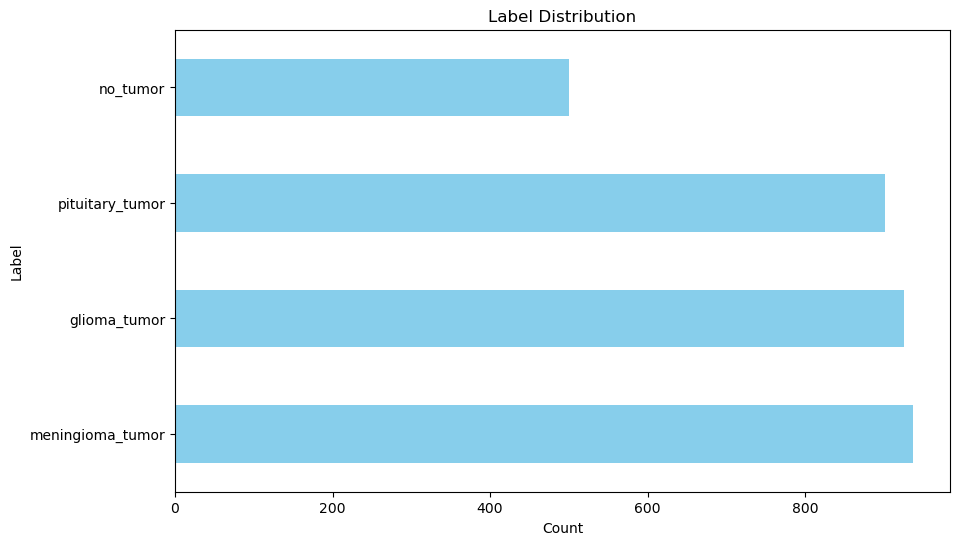


Sample images from the preprocessed dataset:


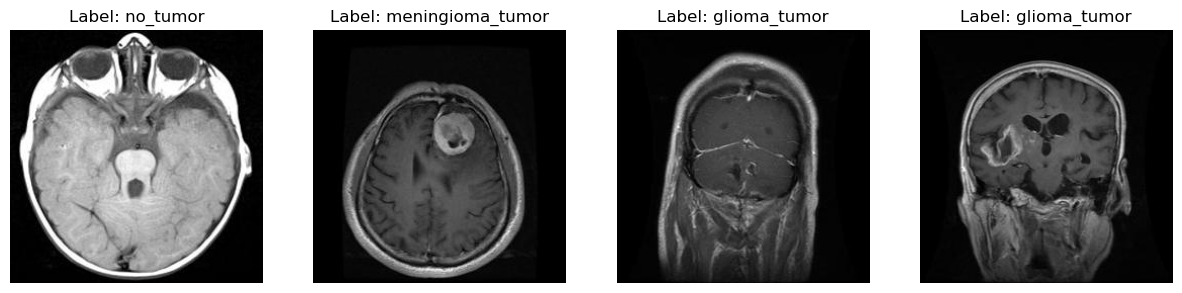

In [56]:
plt.figure(figsize=(10, 6))
label_distribution.plot(kind="barh", title="Label Distribution", color="skyblue")
plt.xlabel("Count")  # Counts on the bottom (x-axis)
plt.ylabel("Label")  # Labels on the left (y-axis)
plt.show()

def display_sample_images(df, num_samples=4):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i, (idx, row) in enumerate(df.sample(num_samples).iterrows()):
        img = mpimg.imread(row["file_path"])
        axes[i].imshow(img, cmap="gray")
        axes[i].set_title(f"Label: {row['label']}")
        axes[i].axis("off")
    plt.show()

print("\nSample images from the preprocessed dataset:")
display_sample_images(df_3)

In [ ]:
output_csv_path = Path("dataset_3.csv")
df_3.to_csv(output_csv_path, index=False)
print(f"\nDataFrame saved to: {output_csv_path}")